# FORTUNE-TELLING WITH PYTHON: AN INTRO TO TIME SERIES MODELING
## Jonathan Balaban
#### Connect with me on [LinkedIn](https://www.linkedin.com/in/jbalaban) and [Github](https://github.com/ultimatist)

![](https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F27728797%2F150577564943%2F1%2Foriginal.jpg?h=230&w=460&rect=0%2C165%2C932%2C466&s=0b175e424f9e6fe378d96daf5714fc50)

## Introduction
We often refer to our input features in machine learning as "dimensions". On that note, there's a dimension that pervades almost everything we do and observe as humans. It's the fourth dimension we experience every waking moment: time. But time is quite unlike other data we capture, and often requires unique machine learning approaches. These models and approaches are fairly established in  R and a few other languages, but have more recently immigrated to Python.

In regession and classification, we use features (collected during a cross-sectional study/survey/measurement) to predict an outcome. The model and parameters represent part of the underlying relationship between features and outcome. But what if we run out of funds to cross-section (it's possible), or need to predict future outcomes for which the features aren't measurable or don't yet exist?

### Examples of time series data and modeling (constant time interval):
- Hedge fund prediction of stock and index movements
- Long and short-term weather forecasting
- Business budgeting and trend analysis
- Health vitals monitoring
- Traffic flows and logistic optimization modeling
- Can you think of others?

Time series data usually contains more than meets the eye, and can often be decomposed into trend, seasonal, and random fluctuation components.

![Decomposition](http://rstatistics.net/wp-content/uploads/2014/09/Multiplicative-Decomposition-of-Time-series.png)

- Trends
    - Up
    - Down
    - Flat
    - Larger trends can be made up of smaller trends
    - There is no defined timeframe for what constitutes a trend; it depends on your goals
- Seasonal Effects
    - Weekend retail sales spikes
    - Holiday shopping
    - Energy requirement changes with annual weather patterns
    - Note: twitter spikes when news happens are not seasonal; they aren't regular and predictable
- Random Fluctuations
    - The human element
    - Aggregations of small influencers
    - Observation errors
    - The smaller this is in relation to Trend and Seasonal, the better we can predict the future
    
Time series models fall into [two camps](http://www.abs.gov.au/websitedbs/D3310114.nsf/home/Time+Series+Analysis:+The+Basics#HOW%20DO%20I%20KNOW%20WHICH%20DECOMPOSITION):
- Additive
    - Data = Trend + Seasonal + Random
    - What we will be using for our modeling
- Multiplicative
    - Data = Trend x Seasonal x Random
    - As easy to fit as Additive if we take the log
        - log(Data) = log(Trend x Seasonal x Random)

We should use multiplicative models when the percentage change of our data is more important than the absolute value change (e.g. stocks, commodities); as the trend rises and our values grow, we see amplitude growth in seasonal and random fluctuations. If our seasonality and fluctuations are stable, we likely have an additive model.

## Time Series Modeling Process
Time series model selection is driven by the Trend and Seasonal components of our raw data. The general approach for analysis looks like this:

1. Plot the data and determine Trends and Seasonality
    1. Difference or take the log of the data (multiple times if needed) to remove trends for [certain model applications](https://en.wikipedia.org/wiki/Stationary_process)
    1. Stationairity is needed for ARMA models
1. Determine if we have additive or multiplicative data patterns
1. Select the appropriate algorithm based on the chart below
1. Determine if model selection is correct with these tools
    - Ljung-Box Test
    - Residual Errors (Normal Distribution with zero mean and constant variance-homoskedastic, i.i.d)
    - Autocorrelation Function (ACF)
    - Partial Autocorrelation Function (PACF)

Algorithm | Trend | Seasonal | Correlations
---|---|---|---
ARIMA | X |X|X
SMA Smoothing |X||
Simple Exponential Smoothing |X||
Seasonal Adjustment |X|X|
Holt's Exponential Smoothing |X||
Holt-Winters |X|X|




## How to achieve and test for stationarity:

- The mean of the series is not a function of time:
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

- The variance of the series is not a function of time (homoscedasticity):
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)

- The covariance at different lags is not a function of time:
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)

[From A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)

- [Info on stationarity](http://www.investopedia.com/articles/trading/07/stationary.asp)
- Plotting Rolling Statistics
    - Plot the moving average/variance and see if it changes with time. This visual technique can be done on different windows, but isn't as rigorously defensible as the test below.
- Dickey-Fuller Test
    - Statistical tests for checking stationarity; the null hypothesis is that the TS is non-stationary. If our test statistic is below an `alpha` value, we _can_ reject the null hypothesis and say that the series is stationary.

$$ Y_t = \rho * Y_{t-1} + \epsilon_t \\$$
$$  Y_t - Y_{t-1} = (\rho - 1) Y_{t - 1} + \epsilon_t \\$$

In [7]:
#!pip install pyflux

import numpy as np
import pandas as pd
import pyflux as pf
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# create a play dataframe from 1-10 (linear and squared) to test how differencing works
play = pd.DataFrame([[x for x in range(1,11)], [x**2 for x in range(1,11)]]).T
play.columns = ['original', 'squared']
play

,original,squared
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49
7,8,64
8,9,81
9,10,100


In [9]:
# stationarize linear series (mean and variance doesn't change for sub-windows)
play.original.diff()

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: original, dtype: float64

In [11]:
# stationarize squared series
play.squared.diff().diff()

0    NaN
1    NaN
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: squared, dtype: float64

In [12]:
# stationarize squared with log
np.log(play.squared)

0    0.000000
1    1.386294
2    2.197225
3    2.772589
4    3.218876
5    3.583519
6    3.891820
7    4.158883
8    4.394449
9    4.605170
Name: squared, dtype: float64

## Data Prep and EDA

We'll be looking at [monthly average temperatures between 1907-1972](https://datamarket.com/data/set/22o4/mean-monthly-temperature-1907-1972#!ds=22o4&display=line)

In [15]:
# load data, recast columns if needed, convert to datetime
monthly_temp = pd.read_csv('./mean-monthly-temperature-1907-19.csv', skipfooter=2, 
                           infer_datetime_format=True, header=0, index_col=0, names=['month', 'temp'])
monthly_temp.index = monthly_temp.index.to_datetime()

In [17]:
# describe
monthly_temp.describe()

,temp
count,792.000000
mean,53.553662
std,15.815452
min,11.200000
25%,39.675000
50%,52.150000
75%,67.200000
max,82.400000


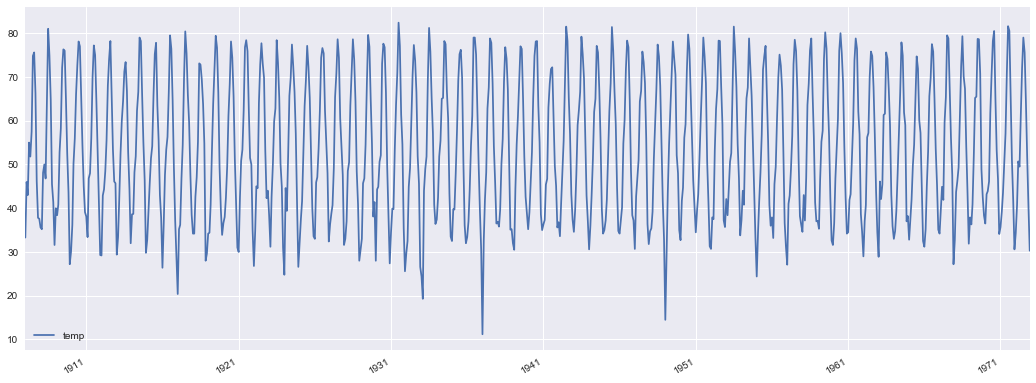

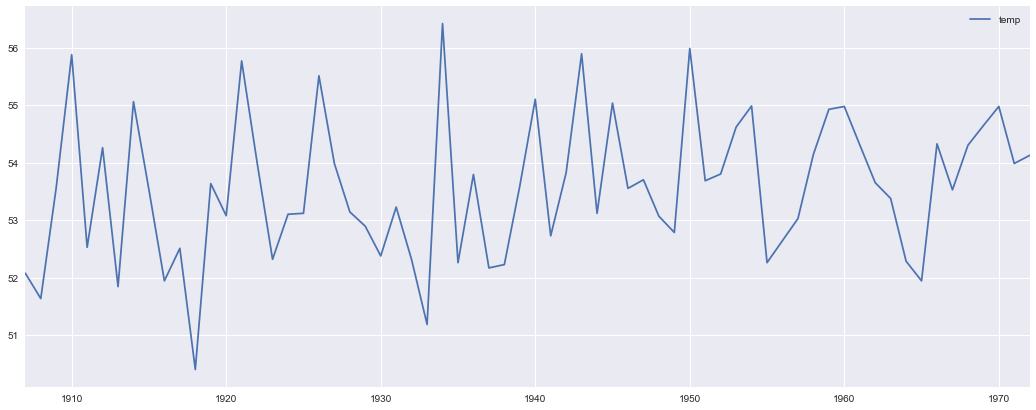

In [24]:
# resample to annual and plot each
annual_temp = monthly_temp.resample('A').mean()
monthly_temp.plot();
annual_temp.plot();

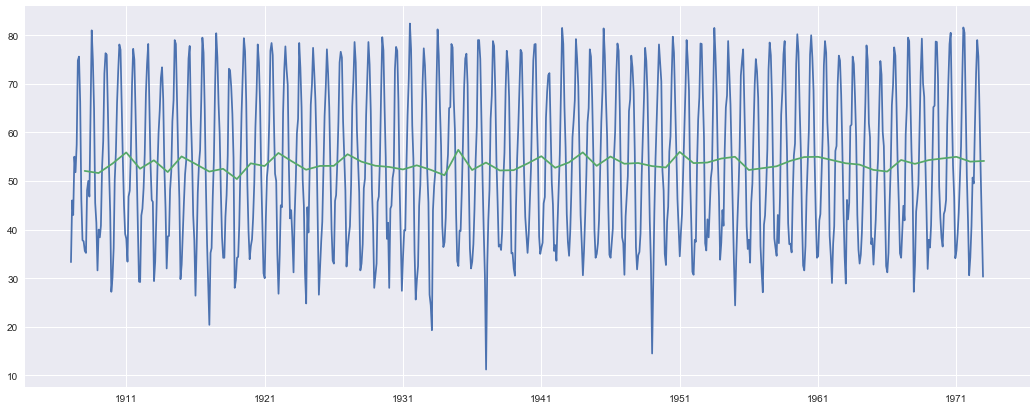

In [25]:
# plot both on same figure
plt.plot(monthly_temp)
plt.plot(annual_temp);

In [26]:
# plot with plotly (optional): might need a plotly account and key
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Scatter(x=annual_temp.index, y=annual_temp.temp)]
py.iplot(data)

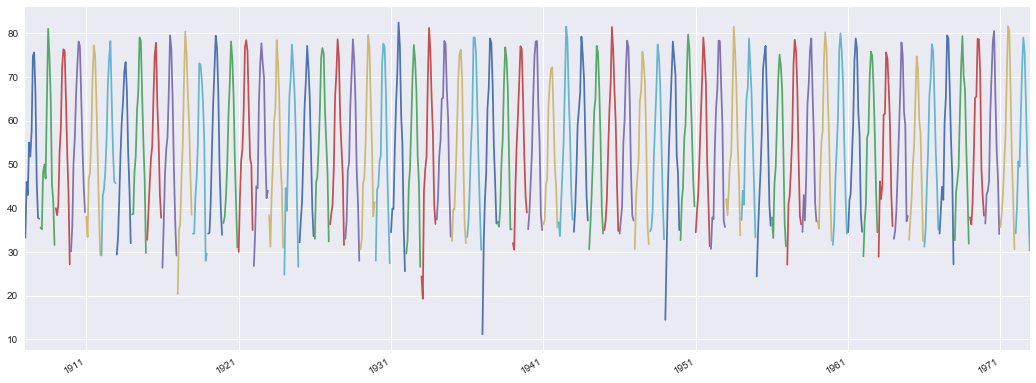

In [27]:
# plot binned yearly segments using resample method
monthly_temp.resample('A').temp.plot();

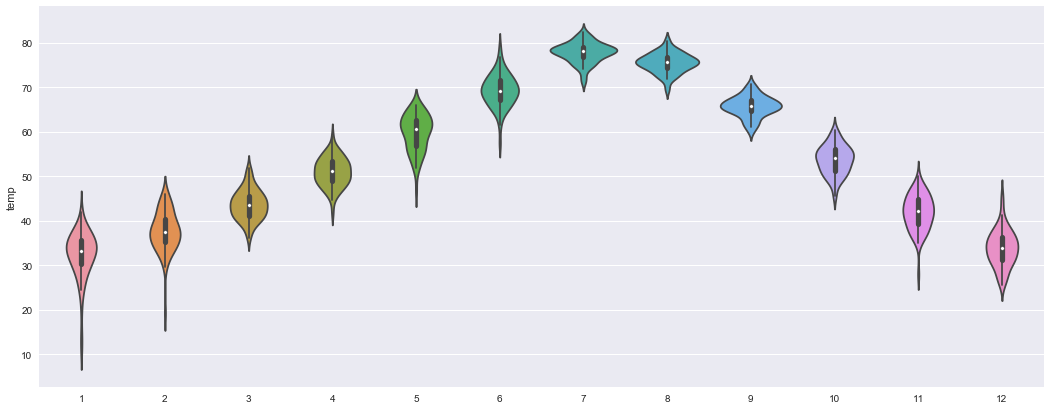

In [28]:
# violinplot months to determine variance and range
sns.violinplot(x=monthly_temp.index.month, y=monthly_temp.temp);

Are these datasets stationary? We can look at a few things per the list above, including a visual check (there seems to be a small upward trend in the annual, too hard to tell for monthly), a standard deviation check on various differences (smallest one is usually most stationary), and the formal Dickey-Fuller test.

In [31]:
# check montly deviations for various diffs
print(monthly_temp.temp.std())
print(monthly_temp.temp.diff().std())
print(monthly_temp.temp.diff().diff().std())
print(monthly_temp.temp.diff().diff().diff().std())

15.815451540670221
9.455426987794672
9.252200624344837
14.726150786762322


In [32]:
# check annual deviations for various diffs
print(annual_temp.temp.std())
print(annual_temp.temp.diff().std())
print(annual_temp.temp.diff().diff().std())
print(annual_temp.temp.diff().diff().diff().std())

1.2621242173990008
1.7725607336526377
3.117841613811376
5.803232109414729


In [33]:
# define Dickey-Fuller Test (DFT) function
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic         -6.481466e+00
p-value                 1.291867e-08
Lags Used               2.100000e+01
Observations Used       7.700000e+02
Critical Value (5%)    -2.865301e+00
Critical Value (1%)    -3.438871e+00
Critical Value (10%)   -2.568773e+00
dtype: float64


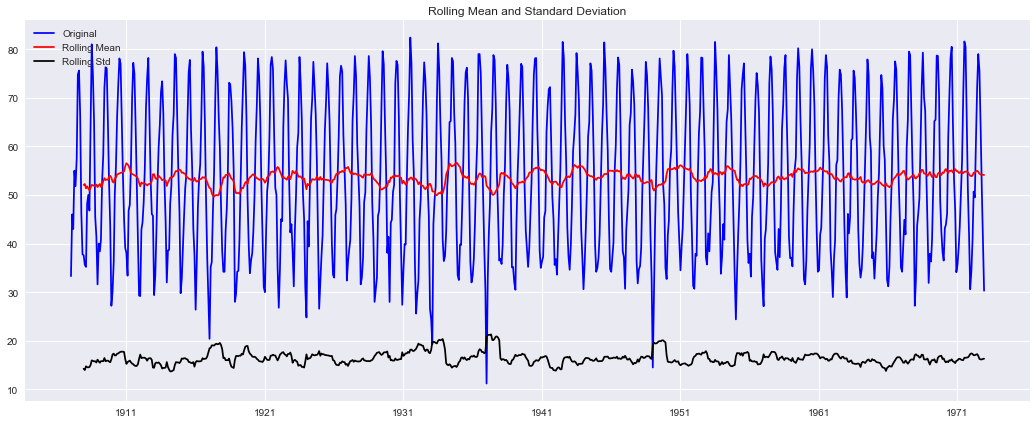

In [34]:
# run DFT on monthly
dftest(monthly_temp.temp)

Test Statistic         -7.878242e+00
p-value                 4.779473e-12
Lags Used               0.000000e+00
Observations Used       6.500000e+01
Critical Value (5%)    -2.907154e+00
Critical Value (1%)    -3.535217e+00
Critical Value (10%)   -2.591103e+00
dtype: float64


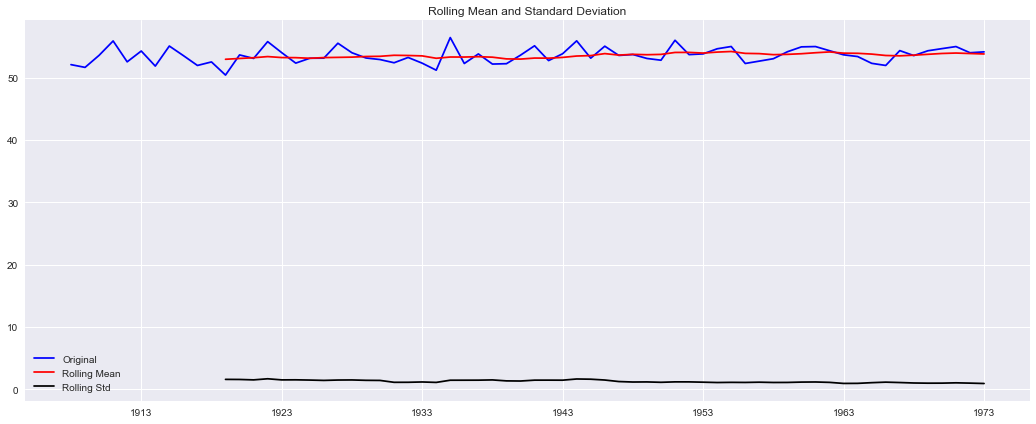

In [35]:
# run DFT on annual
dftest(annual_temp.temp)

## ARIMA with Statsmodels
Enter [Autoregressive Integrated Moving Average (ARIMA)](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) modeling. When we have autocorrelation between outcomes and their ancestors, we will see a theme, or relationship in the outcome plot. This relationship can be modeled in its own way, allowing us to predict the future with a confidence level commensurate to the strength of the relationship and the proximity to known values (prediction weakens the further out we go).

- [ARIMA in R](https://www.otexts.org/fpp/8/5)
- [Duke ARIMA Guide](https://people.duke.edu/~rnau/411arim2.htm)
- [Great explanation on MA in practice](http://stats.stackexchange.com/questions/164824/moving-average-ma-process-numerical-intuition)

### Autoregressive Models

![AR Model](./ar.svg)

Autocorrelation: a variable's correlation with itself at different lags.

For second-order stationary (both mean and variance: $\mu_t = \mu$ and $\sigma_t^2 = \sigma^2$ for all $t$) data, autocovariance is expressed as a function only of the time lag $k$:

$$ \gamma_k = E[(x_t-\mu)(x_{t+k} - \mu)] $$
  
Therefore, the autocorrelation function is defined as:

$$ \rho_k = \frac{\gamma_k}{\sigma^2} $$
  
We use the plot of these values at different lags to determine optimal ARIMA parameters. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/ArTimeSeries.svg/685px-ArTimeSeries.svg.png)
By Tomaschwutz - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=14740378


Some things to note:
1. AR models propagate shocks infinitely
1. Current random error is the `epsilon` error term
1. if a process depends on previous values of itself then it is an AR process. If it depends on previous errors than it is an MA process.
1. AR processes will exhibit exponential decay in ACR and a cut-off in PACR

### Moving Average Models (This is NOT a Simple/Weighted/Exponential Moving Average)

![MA Model](./ma.svg)

Some things to note:
1. MA models do not propagate shocks infinitely; they die after `q` lags
1. All previous errors up to a lag are rolled into the `epsilon` error term for that period
1. if a process depends on previous values of itself then it is an AR process. If it depends on previous errors than it is an MA process.
1. MA processes will exhibit exponential decay in PACR and a cut-off in ACR

![SARIMA Form](https://www.otexts.org/sites/default/files/fpp/images/sarima1.png)

In [36]:
# define helper plot function for visualization
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

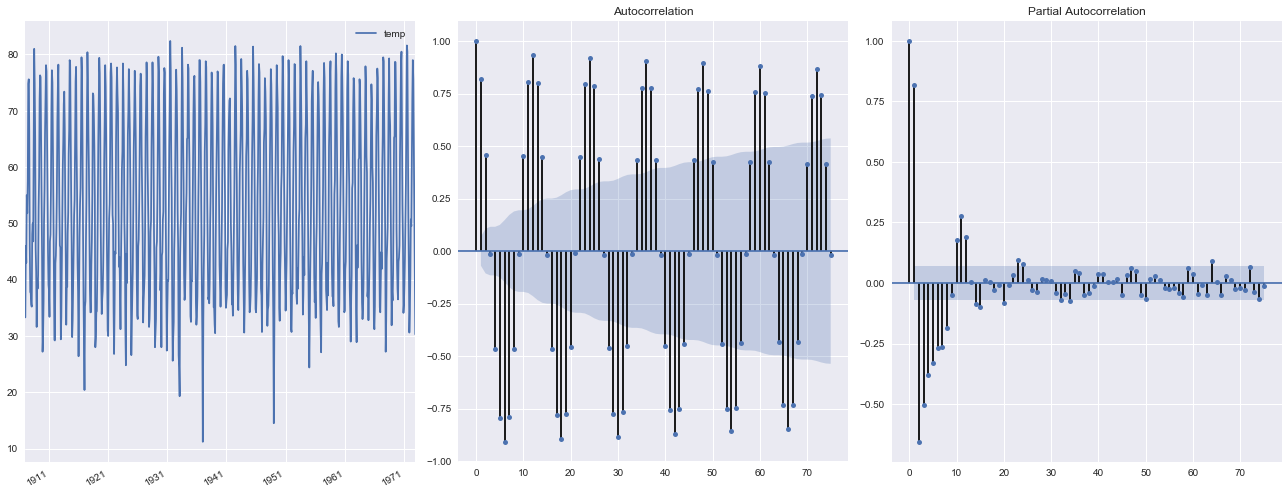

In [37]:
# helper plot for monthly temps
plots(monthly_temp, lags=75);

### [Box-Jenkins Method](https://en.wikipedia.org/wiki/Box–Jenkins_method)

ACF Shape|Indicated Model
---|---
Exponential, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.
Alternating positive and negative, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to help identify the order.
One or more spikes, rest are essentially zero|Moving average model, order identified by where plot becomes zero.
Decay, starting after a few lags|Mixed autoregressive and moving average (ARMA) model.
All zero or close to zero|Data are essentially random.
High values at fixed intervals|Include seasonal autoregressive term.
No decay to zero|Series is not stationary.

In [54]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(monthly_temp.temp, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               temp   No. Observations:                  792
Model:             SARIMAX(3, 0, 0)x(0, 1, 1, 12)   Log Likelihood               -2126.970
Date:                            Wed, 03 May 2017   AIC                           4265.939
Time:                                    17:24:55   BIC                           4293.895
Sample:                                         0   HQIC                          4276.691
                                            - 792                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0113      0.008      1.509      0.131      -0.003       0.026
ar.L1          0.1711      0.036      4.741      0.000       0.100       0.242
ar.L2          0.0229      0.036      0.638      0.524      -0.048       0.093
ar.L3          0.0615      0.037      1.664      0.096      -0.011       0.134
ma.S.L12      -0.9998      2.178     -0.459      0.646      -5.269       3.270
sigma2        12.8275     27.819      0.461      0.645     -41.697      67.352
===================================================================================
Ljung-Box (Q):                       21.90   Jarque-Bera (JB):               242.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

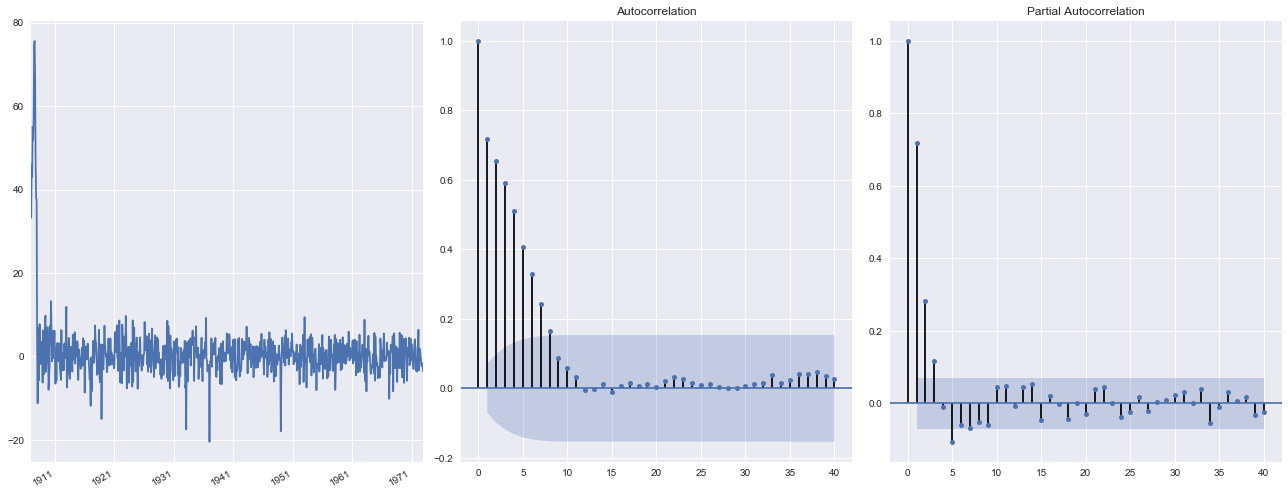

In [51]:
# plot resids
plots(sar.resid, lags=40);

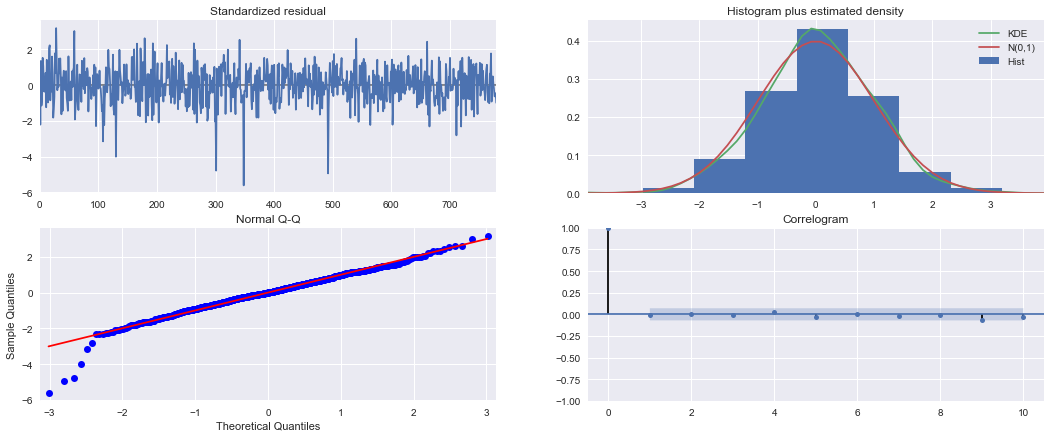

In [56]:
# plot residual diagnostics
sar.plot_diagnostics();

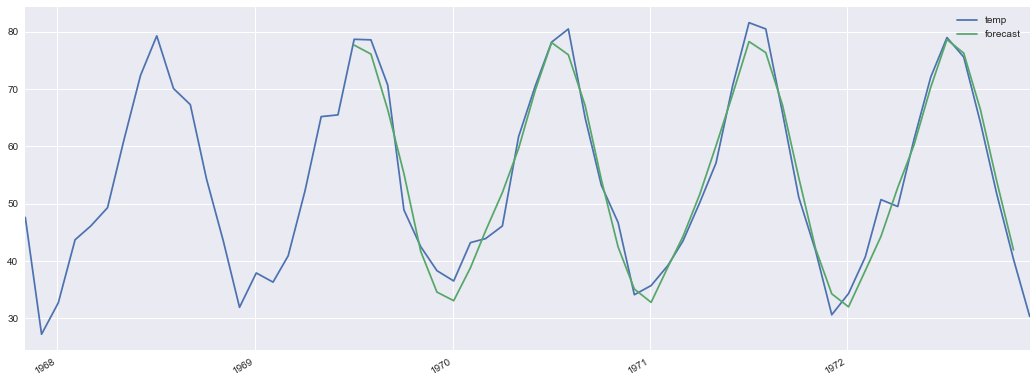

In [57]:
# plot predictions
monthly_temp['forecast'] = sar.predict(start = 750, end= 790, dynamic=False)  
monthly_temp[730:][['temp', 'forecast']].plot();

### Statistical Tests


- [Normality (Jarque-Bera)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality)
    - Null hypothesis is normally distributed residuals (good, plays well with RMSE and similar error metrics)

- [Serial correlation (Ljung-Box)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation)
    - Null hypothesis is no serial correlation in residuals (independent of each other)

- [Heteroskedasticity](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity)
    - Tests for change in variance between residuals.
    - The null hypothesis is of no heteroskedasticity. That means different things depending on which alternative is selected:
        - Increasing: Null hypothesis is that the variance is not increasing throughout the sample; that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.
        - Decreasing: Null hypothesis is that the variance is not decreasing throughout the sample; that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample.
        - Two-sided (default): Null hypothesis is that the variance is not changing throughout the sample. Both that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample and that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.

- [Durbin Watson](https://en.wikipedia.org/wiki/Durbin–Watson_statistic)
    - Tests autocorrelation of residuals: we want between 1-3, 2 is ideal (no serial correlation)

In [ ]:
# create and run statistical tests on model


### Note on autofit methods
R has an autoARIMA function (and other automagic methods) that gridsearches/optimizes our model parameters for us. Over time, more of these goodies are porting to Python (e.g. statsmodels.tsa.x13 import x13_arima_select_order). While there's nothing wrong with utilizing these resources, the _human makes the final determination!_ Don't become over-reliant on these methods, especially early on when you are grasping the underlying mechanics and theory!

In [ ]:
# autoselect for monthly, limited to only searching AR and MA parameters
autores = sm.tsa.arma_order_select_ic(monthly_temp.temp, ic=['aic', 'bic'], trend='c', max_ar=4, max_ma=4, fit_kw=dict(method='css-mle'))

print('AIC', autores.aic_min_order) # will use this as inputs for annual
print('BIC', autores.bic_min_order)

In [ ]:
# using itertools to gridsearch solutions
import itertools
import itertools

#set parameter range; UPDATE THESE!
p = q = range(0, 3)
d = range(0, 2)
season = 12

# list of all parameter combos
pdq = list(itertools.product(p, d, q))
# same for seasonal variant
seasonal_pdq = [(x[0], x[1], x[2], season) for x in list(itertools.product(p, d, q))]

print('SARIMAX: {} , {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} , {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} , {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} , {}'.format(pdq[2], seasonal_pdq[4]))



## Predicting Sunspots with Pyflux and ARIMA

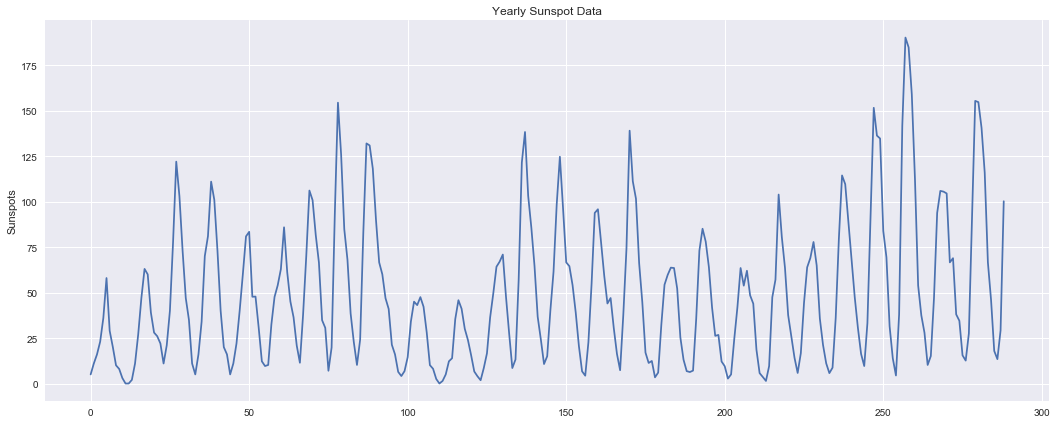

In [58]:
# read and plot data
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sunspot.year.csv') #

plt.figure()
plt.plot(data.index,data['sunspot.year'])
plt.ylabel('Sunspots')
plt.title('Yearly Sunspot Data');

In [59]:
# fit and summarize model
model = pf.ARIMA(data=data,ar=4,ma=4,integ=0,target='sunspot.year')
x = model.fit("MLE")
x.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: sunspot.year                        Method: MLE                                       
Start Date: 4                                           Log Likelihood: -1180.5324                        
End Date: 288                                           AIC: 2381.0648                                    
Number of observations: 285                             BIC: 2417.5897                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 2.6356     1.0926     2.4122   0.0159   (0.494 | 4.7772)         
AR(1)                                

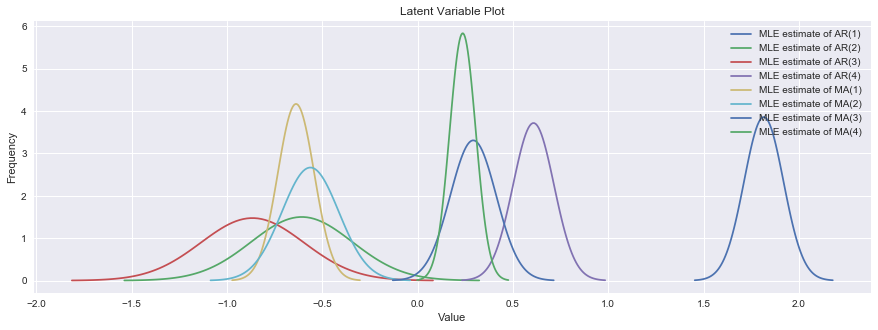

In [60]:
# plot z-scores of feature coefficients
model.plot_z(indices=range(1,9))

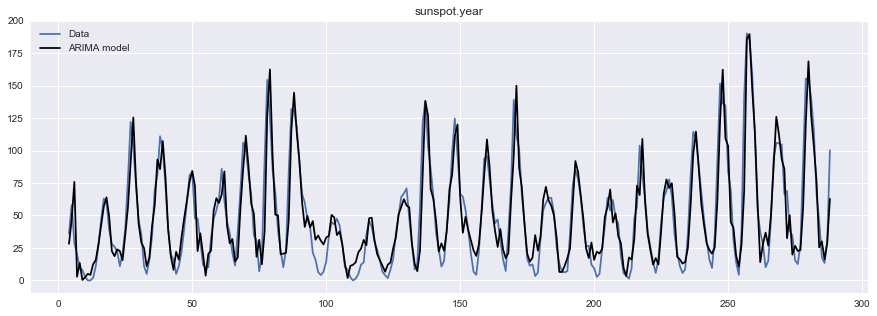

In [61]:
# plot model
model.plot_fit(figsize=(15,5))

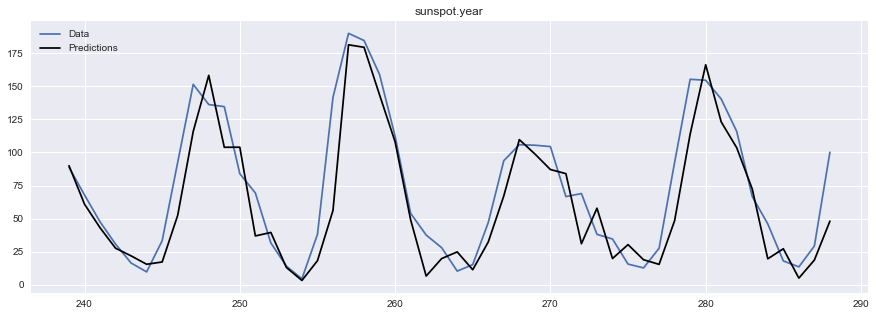

In [62]:
# plot in sample
model.plot_predict_is(50, figsize=(15,5))

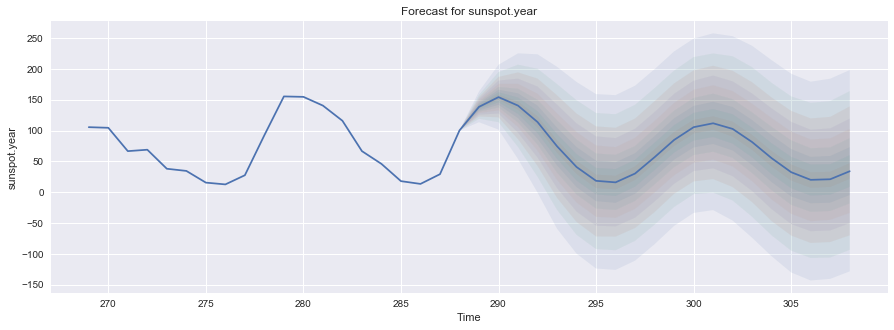

In [63]:
# plot forecast
model.plot_predict(h=20,past_values=20, figsize=(15,5))

In [64]:
# compare tail to prediction
data.tail()

,Unnamed: 0,time,sunspot.year
284,285,1984,45.9
285,286,1985,17.9
286,287,1986,13.4
287,288,1987,29.2
288,289,1988,100.2


In [66]:
model.predict(h=12)

,sunspot.year
289,138.464513
290,154.282602
291,140.500016
292,113.826086
293,74.497439
294,40.860413
295,18.408237
296,15.923025
297,30.266495
298,56.804989


## ARIMA with Pyflux: Student Practice

In [ ]:
# helper plot


In [ ]:
# build and summarize model


In [ ]:
# plot z-scores of feature coefficients


In [ ]:
# plot model against raw data


In [ ]:
# plot predictions


In [ ]:
# plot forecast


In [ ]:
# predict future values


## CO2 Levels and Forecasting
Statsmodels has some 'built-in' time series datasets to play with, including one that tracks atmospheric CO2 from continuous air samples at Mauna Loa Observatory in Hawaii. This data includes CO2 samples from MAR 1958 to DEC 2001.

[Credits](https://www.digitalocean.com/community/users/tvincent) 

In [ ]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

In [ ]:
# resample to monthly and check missing values
co2 = co2['co2'].resample('MS').mean()

co2 = co2.fillna(co2.bfill())
co2.isnull().sum()

In [ ]:
# decompose data into trend, seasonal, and residual
decomposition = sm.tsa.seasonal_decompose(co2, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# build model
co2sar = sm.tsa.statespace.SARIMAX(co2, order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
co2sar.summary()

In [ ]:
# check diagnostics
co2sar.plot_diagnostics();

In [ ]:
# create predictions and confidence intervals
pred = co2sar.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False) # we use as many true values as possible to predict
pred_ci = pred.conf_int()

In [ ]:
# plot predictions
ax = co2['1993':].plot(label='Observed CO2 Levels')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.8) # this is using all available info

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Year')
ax.set_ylabel('CO2')
plt.legend()

plt.show();

In [ ]:
# compute mean square error
fcast = pred.predicted_mean
true = co2['1998-01-01':]

mse = ((fcast - true) ** 2).mean()
print('MSE of our forecasts is {}'.format(round(mse, 3)))

In [ ]:
# dynamic forecast
fcast = co2sar.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
fcast_ci = fcast.conf_int()

# caution: this is modeling assumptions on top of assumptions

In [ ]:
# student practice: use template from above
# plot predictions


In [ ]:
# compute mean square error


In [ ]:
# forecast next 100 months and get confidence interval


In [67]:
# plot forecast


## Closing

- Which areas of time series modeling are most interesting?
- Which concepts are most challenging?
- How will you apply these concepts to your work or personal projects?
- Have you used other packages or tools that you've found helpful?

For more, check out the [Facebook Prophet](https://github.com/facebookincubator/prophet) and [Pyflux](http://www.pyflux.com) projects.

#### Connect with me on [LinkedIn](https://www.linkedin.com/in/jbalaban) and [Github](https://github.com/ultimatist)